<a href="https://colab.research.google.com/github/Upkar1/Stock_Market_Analysis/blob/master/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from google.colab import files

In [68]:
upload0=files.upload()

Saving MINDTREE.NS.csv to MINDTREE.NS (1).csv


In [69]:
upload1=files.upload()

Saving INF.csv to INF (2).csv


In [70]:
upload2=files.upload()

Saving TeM.csv to TeM (2).csv


In [0]:
MT=pd.read_csv(r"MINDTREE.NS.csv")
INF=pd.read_csv(r"INF.csv")
TeM=pd.read_csv(r"TeM.csv")

In [0]:
#@title Processing the data
MT['Date_Day']=pd.to_datetime(MT['Date'])
MT['Date_Day']=MT['Date_Day'].dt.day_name()
INF['Date_Day']=pd.to_datetime(INF['Date'])
INF['Date_Day']=INF['Date_Day'].dt.day_name()
TeM['Date_Day']=pd.to_datetime(TeM['Date'])
TeM['Date_Day']=TeM['Date_Day'].dt.day_name()
MT.columns
INF.columns
TeM.columns
MTd=['Date']
INFd=['Date']
TeMd=['Date']
col=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for i in range(len(col)):
  MTd.append(col[i]+'_MT')
  INFd.append(col[i]+'_INF')
  TeMd.append(col[i]+'_TeM')
MTd.append('Date_Day')
MT_z={i:j for i,j in zip(MT.columns,MTd)}
INF_z={i:j for i,j in zip(INF.columns,INFd)}
TeM_z={i:j for i,j in zip(TeM.columns,TeMd)}
MT.rename(columns=MT_z,inplace=True)
INF.rename(columns=INF_z,inplace=True)
TeM.rename(columns=TeM_z,inplace=True

#Stock Market Analysis

   What all terms come to our mind when we hear about the stock market? Shares, Price, High, Low to name a few. Well, to define the Stock Market, we can say it is a network of buyers and sellers that trade the stocks(not a physical or discrete entity) and the percent of stocks one owns tells about his ownership in that particular organization (the stocks of the organization brought or sold by him).

 In this report we will ananlyze various factors that effect the stocks in the stock market. So, the Company datasets which we have with us for the analysis purpose are:-
 
**1.   Mindtree** ( Representead as **MT** in the report)

**2.   Infosys** ( Represented as **INF** in the report) 

**3. Tech Mahindra** (Represented as **TeM** in the report)


We have datasets for one year (**From 2018 to 2019**) for the above mentioned companies and as we move on, we will see how the companies have sailed through for the one year time.

#A Quick Look at Stats

So we will see what all our data contains...

Let's have a look at what all **Columns** do we have in our datasets and the values...

In [77]:
#@title MT

MT.head()

Date     Open_MT     High_MT  ...  Adj Close_MT  Volume_MT   Date_Day
0  2018-06-25  985.849976  986.349976  ...    938.018799    1366241     Monday
1  2018-06-26  952.000000  972.500000  ...    951.648254    2224769    Tuesday
2  2018-06-27  973.700012  986.599976  ...    957.651123    2198459  Wednesday
3  2018-06-28  971.000000  979.799988  ...    937.821960    1169352   Thursday
4  2018-06-29  958.049988  994.799988  ...    971.182190    1049747     Friday

[5 rows x 8 columns]

In [78]:
#@title INF
INF.head()

Date    Open_INF    High_INF  ...  Adj Close_INF  Volume_INF   Date_Day
0  2018-06-25  628.575012  639.400024  ...     620.604431   7731178.0     Monday
1  2018-06-26  634.500000  641.950012  ...     623.238220   4483504.0    Tuesday
2  2018-06-27  641.974976  646.724976  ...     619.409546   6952142.0  Wednesday
3  2018-06-28  638.150024  649.000000  ...     628.968933  10996818.0   Thursday
4  2018-06-29  649.025024  657.500000  ...     637.552856   9966600.0     Friday

[5 rows x 8 columns]

In [79]:
#@title TeM
TeM.head()

Date    Open_TeM    High_TeM  ...  Adj Close_TeM  Volume_TeM   Date_Day
0  2018-06-25  692.950012  699.900024  ...     680.713074     1850829     Monday
1  2018-06-26  695.000000  699.900024  ...     672.597107     1687463    Tuesday
2  2018-06-27  692.000000  716.900024  ...     698.411682     5570107  Wednesday
3  2018-06-28  716.049988  721.750000  ...     649.520447     8192199   Thursday
4  2018-06-29  673.900024  675.799988  ...     640.915588    10890801     Friday

[5 rows x 8 columns]

As we see, our data contains same column names followed by the companys' name that it represents, which is pretty obvious. 
Here's a  description of what you can interpret from the following columns:-


1. **Date**- the date of the month

2. **Open_**- the amount at which the stock was opened for trading on the particular date

3. **High_**- the highest amount that the stock was traded for on that particular date

4. **Low_**- the lowest amount that the stock was traded for on that date

5. **Close_**- the amount at which the stock was closed for trade on a particular date ( the raw price, the cash value)

6. **Adj. Close_**- the actual amount at which the stock was closed (counting in all the factors that might effect the prices of the stock when the market is closed)

7. **Volume_**- the number of stocks exchanged on the particular date

8. **Date_Day_**- the day of the week corresponding to the date


**The Prices listed here are in INR**




Now we should see some basic stats regarding our data...
Here we go....

In [80]:
#@title MT: Basic Stats
MT.describe()

Open_MT      High_MT  ...  Adj Close_MT     Volume_MT
count   244.000000   244.000000  ...    244.000000  2.440000e+02
mean    946.563526   959.503281  ...    939.804850  1.511732e+06
std      84.453464    85.140171  ...     82.539602  1.474618e+06
min     778.000000   785.450012  ...    766.085205  9.829100e+04
25%     880.500000   897.037491  ...    874.099335  7.654070e+05
50%     955.000000   965.200012  ...    946.265167  1.122134e+06
75%     982.849991   989.837494  ...    980.099976  1.747511e+06
max    1165.000000  1183.800049  ...   1150.317749  1.338521e+07

[8 rows x 6 columns]

In [81]:
MT.shape

(244, 8)

As we see, we have a total count of 244 days trade and the mean of prices for all the columns lies between Rs. 931  to Rs. 960 while the max ranges from Rs.1147 to Rs.1184.

In [82]:
#@title INF: Basic Stats
INF.describe()

Open_INF    High_INF  ...  Adj Close_INF    Volume_INF
count  241.000000  241.000000  ...     241.000000  2.410000e+02
mean   704.937242  712.050624  ...     692.414752  8.332826e+06
std     35.544398   35.295474  ...      37.061177  4.114592e+06
min    621.000000  628.000000  ...     610.476257  7.589560e+05
25%    673.549988  682.000000  ...     660.207642  6.018930e+06
50%    713.000000  719.900024  ...     699.321289  7.212099e+06
75%    735.500000  742.299988  ...     722.888306  9.277241e+06
max    770.000000  773.000000  ...     756.562622  3.534468e+07

[8 rows x 6 columns]

In [84]:
INF.shape

(243, 8)

Here we have a total count of 241 days trade and the mean of prices for all the columns lies between Rs.692  to Rs.712 while the max ranges from Rs.756 to Rs.770 .

In [85]:
#@title TeM: Basic Stats
TeM.describe()

Open_TeM    High_TeM  ...  Adj Close_TeM    Volume_TeM
count  243.000000  243.000000  ...     243.000000  2.430000e+02
mean   733.968520  742.923048  ...     731.519479  3.247384e+06
std     53.477631   52.733066  ...      55.498286  1.965095e+06
min    624.000000  634.599976  ...     617.349976  1.113760e+05
25%    695.000000  705.000000  ...     694.200012  2.061628e+06
50%    730.000000  738.000000  ...     728.250000  2.826290e+06
75%    779.850006  788.549988  ...     777.475006  3.711250e+06
max    836.400024  846.500000  ...     837.000000  1.486085e+07

[8 rows x 6 columns]

In [86]:
TeM.shape

(243, 8)

As we note, we have a total count of 243 days trade and the mean of prices for all the columns lies between Rs.723 to Rs.743 while the max ranges from Rs.829 to Rs.847.

So those stats show that we are not having any outliers in our dataset and everything works out fine.
But one thing to note is that we have **243 day record for MT and TeM** and **241 day record for INF**. That indicates of null values being present in our dataset. So why not check for them and see.....

In [87]:
#@title MT: A check for null values 
MT.isnull().sum()

Date            0
Open_MT         0
High_MT         0
Low_MT          0
Close_MT        0
Adj Close_MT    0
Volume_MT       0
Date_Day        0
dtype: int64

No null values. Looks good.

In [88]:
#@title TeM: A check for null values
TeM.isnull().sum()

Date             0
Open_TeM         0
High_TeM         0
Low_TeM          0
Close_TeM        0
Adj Close_TeM    0
Volume_TeM       0
Date_Day         0
dtype: int64

We are all clear here as well.

In [89]:
#@title INF: A check for null values
INF.isnull().sum()

Date             0
Open_INF         2
High_INF         2
Low_INF          2
Close_INF        2
Adj Close_INF    2
Volume_INF       2
Date_Day         0
dtype: int64

So, finally we found what we were looking for... and it was obvious for us to get null values over here because it had 2 records less than the other data sets.

Let's have a look where we have the null values in our dataset....

In [91]:
INF[pd.isnull(INF).any(axis=1)]

Date  Open_INF  High_INF  ...  Adj Close_INF  Volume_INF   Date_Day
184  2019-03-26       NaN       NaN  ...            NaN         NaN    Tuesday
185  2019-03-27       NaN       NaN  ...            NaN         NaN  Wednesday

[2 rows x 8 columns]

We don't have any records for these two dates. It will be better for us to delete the two rows from the dataset and also from the other two datsets at the same date so we can easily compare and analyze what we have with us.

So here we go...

In [92]:
INF=INF.dropna(axis=0,how='any')
INF.isnull().sum()

Date             0
Open_INF         0
High_INF         0
Low_INF          0
Close_INF        0
Adj Close_INF    0
Volume_INF       0
Date_Day         0
dtype: int64

In [93]:
len(INF.index)

241

So we see, now we have no null values in our dataset. Let's do the same for **TeM** and **MT** i.e. we would **remove the rows** where we have the dates **2019-03-26** and **2019-03-27**.

In [94]:
MT.drop(MT.loc[MT['Date']=='2019-03-25'].index, inplace=True)
MT.drop(MT.loc[MT['Date']=='2019-03-26'].index, inplace=True)
MT.drop(MT.loc[MT['Date']=='2019-03-27'].index, inplace=True)
MT.isnull().sum()

Date            0
Open_MT         0
High_MT         0
Low_MT          0
Close_MT        0
Adj Close_MT    0
Volume_MT       0
Date_Day        0
dtype: int64

In [95]:
len(MT.index)

241

In [97]:
TeM.drop(TeM.loc[TeM['Date']=='2019-03-26'].index, inplace=True)
TeM.drop(TeM.loc[TeM['Date']=='2019-03-27'].index, inplace=True)
TeM.isnull().sum()

Date             0
Open_TeM         0
High_TeM         0
Low_TeM          0
Close_TeM        0
Adj Close_TeM    0
Volume_TeM       0
Date_Day         0
dtype: int64

In [98]:
len(TeM.index)

241

We managed to delete the rows on that particular dates and we do not have any more null values and the count of the rows is also the same. We are probably good to go...

But before we proceed, we must merge our datasets for further analysis.

In [99]:
#@title Stock: Our merged dataset
Stock=pd.merge(MT,INF,on='Date')
Stock=pd.merge(Stock,TeM,on='Date')
Stock.head()

Date     Open_MT     High_MT  ...  Adj Close_TeM  Volume_TeM   Date_Day
0  2018-06-25  985.849976  986.349976  ...     680.713074     1850829     Monday
1  2018-06-26  952.000000  972.500000  ...     672.597107     1687463    Tuesday
2  2018-06-27  973.700012  986.599976  ...     698.411682     5570107  Wednesday
3  2018-06-28  971.000000  979.799988  ...     649.520447     8192199   Thursday
4  2018-06-29  958.049988  994.799988  ...     640.915588    10890801     Friday

[5 rows x 22 columns]

In [100]:
Stock.describe()

Open_MT      High_MT  ...  Adj Close_TeM    Volume_TeM
count   240.000000   240.000000  ...     240.000000  2.400000e+02
mean    946.569585   959.584169  ...     730.974722  3.250788e+06
std      85.148341    85.841852  ...      55.616487  1.974906e+06
min     778.000000   785.450012  ...     617.349976  1.113760e+05
25%     875.000000   895.000000  ...     694.062515  2.062778e+06
50%     955.024994   967.700012  ...     728.024994  2.823268e+06
75%     983.237503   989.950012  ...     777.362503  3.707237e+06
max    1165.000000  1183.800049  ...     837.000000  1.486085e+07

[8 rows x 18 columns]

Looks good. Let's head towards univariate analysis...

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

#Univariate Analysis

Through this we would see for the distribution in our dataset and try to look for anomalies in our dataset..

Let's check the distribution for **Open_MT, Open_INF, Open_TeM**...









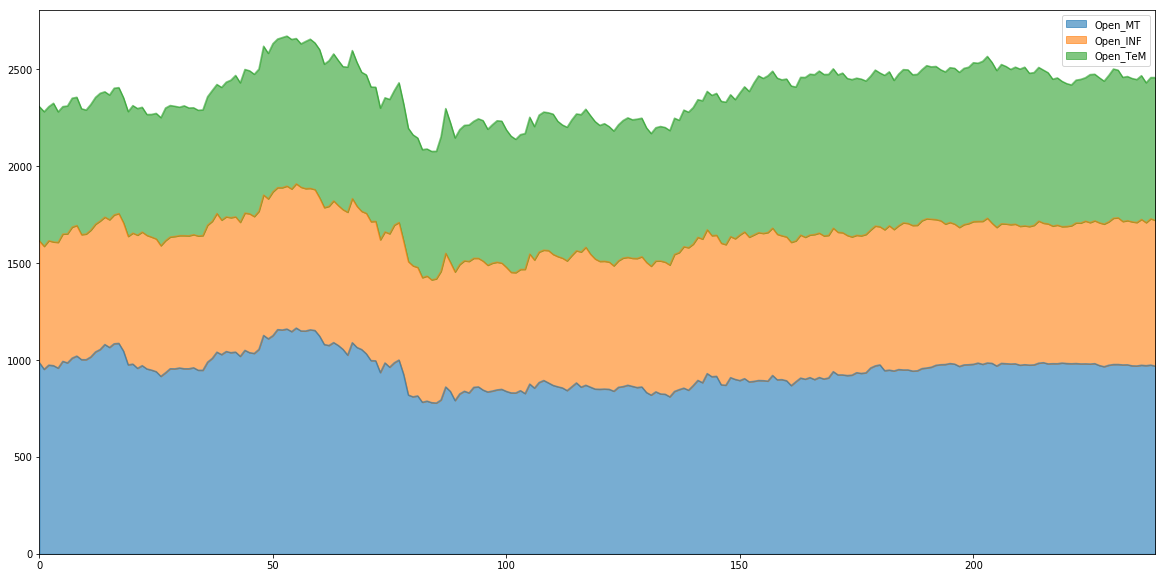

In [141]:
#@title Open_
Stock[['Open_MT','Open_INF','Open_TeM']].plot(kind='area',figsize=(20,10),alpha=0.6).set_facecolor('white')
plt.show()

In [143]:
#@title Stats for the above graph
Stock[['Open_MT','Open_INF','Open_TeM']].describe()

Open_MT    Open_INF    Open_TeM
count   240.000000  240.000000  240.000000
mean    946.569585  704.781147  733.338126
std      85.148341   35.535810   53.500442
min     778.000000  621.000000  624.000000
25%     875.000000  673.449997  694.862503
50%     955.024994  712.899994  729.250000
75%     983.237503  735.125000  779.175003
max    1165.000000  770.000000  836.400024

So, we see that the stocks of MT had often opened up their trades in the range **778 - 1165**, the mean being  around **947**, while for INF an TeM the open prices have been in the range of **621 - 836**. Thus the value of MT shares is slightly higher in the market than what we have for INF and TeM.

Let's have a check over **High_MT, High_INF, High_TeM** and see what the stats have to tell us....

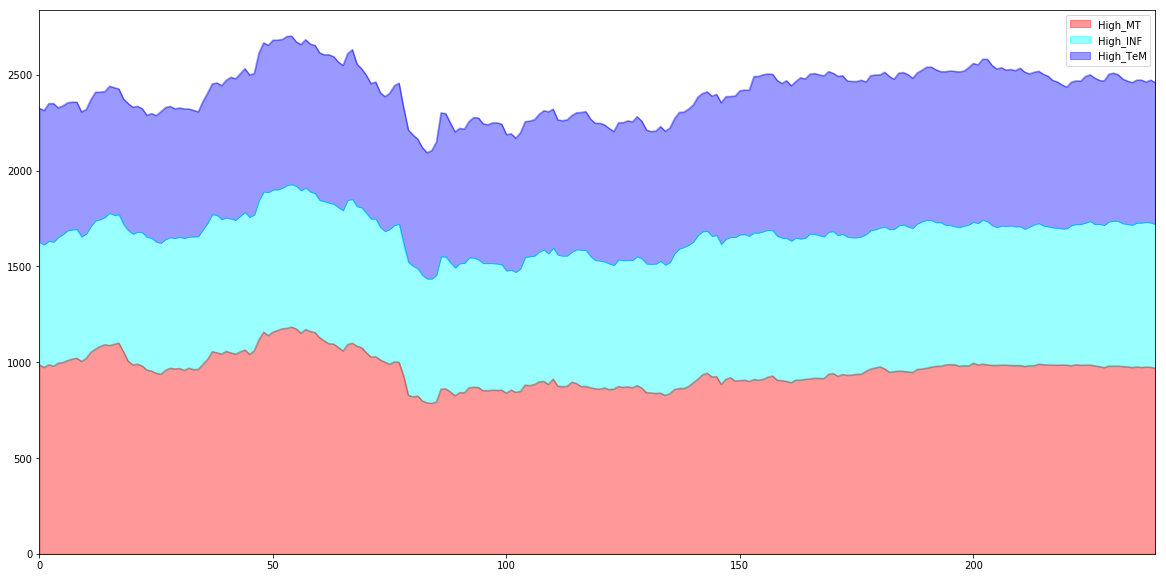

In [140]:
#@title High_
Stock[['High_MT','High_INF','High_TeM']].plot(kind='area',figsize=(20,10),color=['red','cyan','blue'],alpha=0.4)
plt.show()

In [144]:
#@title Stats for the above graph
Stock[['High_MT','High_INF','High_TeM']].describe()

High_MT    High_INF    High_TeM
count   240.000000  240.000000  240.000000
mean    959.584169  711.924169  742.374795
std      85.841852   35.314486   52.820580
min     785.450012  628.000000  634.599976
25%     895.000000  682.000000  704.975006
50%     967.700012  719.550018  738.000000
75%     989.950012  740.987488  786.537476
max    1183.800049  773.000000  846.500000

As we note, the graph shows similar trends as the comparision between the open prices of the stocks, and we see that the High_ amount of MT shares is slightly more of what could be acheived by INF and TeM. All time high for **MT** is **around 1184** while for **INF** and **TeM** it's **773** and **847** respectively.

**Low_MT, Low_INF, Low_TeM**....

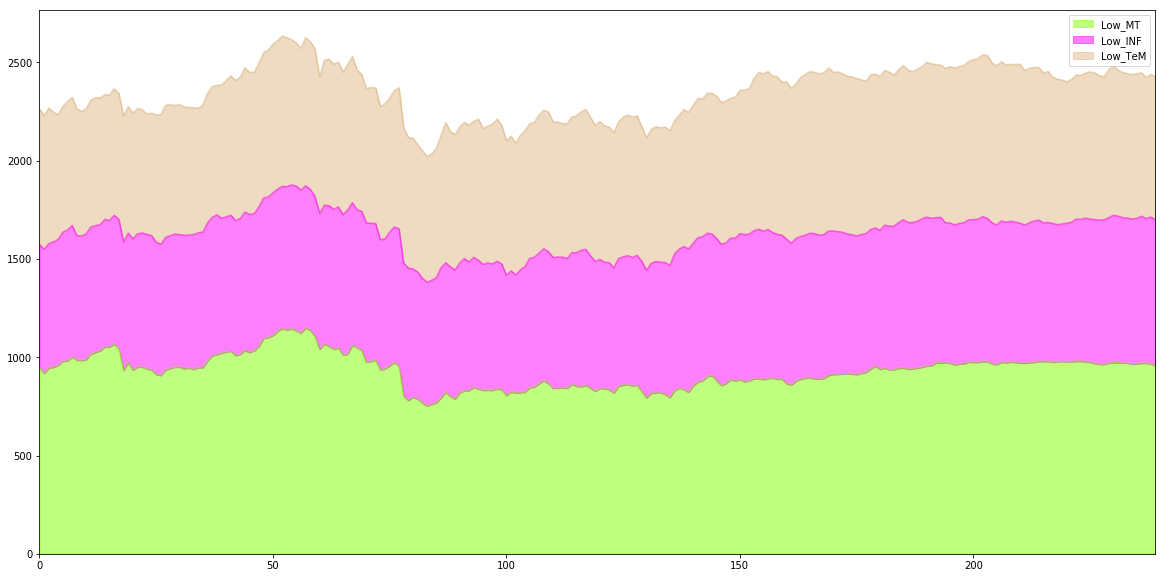

In [139]:
#@title Low_
Stock[['Low_MT','Low_INF','Low_TeM']].plot(kind='area',figsize=(20,10),color=['chartreuse','magenta','burlywood'],alpha=0.5)
plt.show()

In [145]:
#@title Stats for the above graph
Stock[['Low_MT','Low_INF','Low_TeM']].describe()

Low_MT     Low_INF     Low_TeM
count   240.000000  240.000000  240.000000
mean    931.851666  696.769061  722.624582
std      84.228493   36.553985   54.100191
min     752.150024  599.849976  612.400024
25%     860.687500  663.824997  685.187515
50%     943.899994  705.875000  717.724976
75%     976.337479  727.112488  769.424988
max    1147.800049  761.000000  829.099976

So, the range for Low lies between **752 - 1148** for **MT** while for it's between **696 - 761** and **612 - 830** for **INF** and **TeM** respectively.

Let's have a look at the distribution of **Close_MT, Close_INF, Close_TeM**....


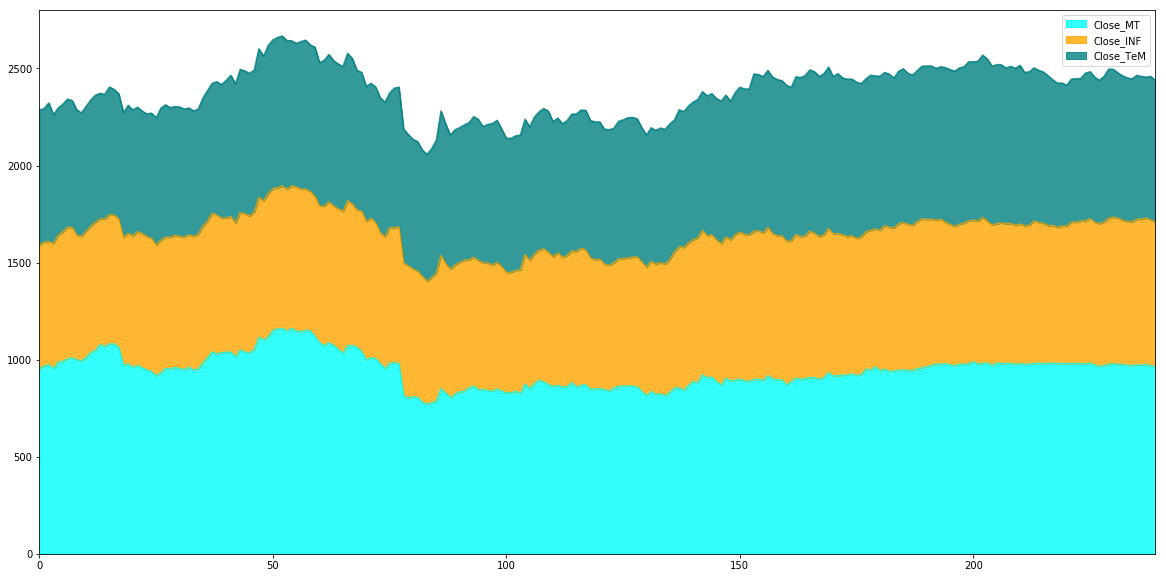

In [138]:
#@title Close_
Stock[['Close_MT','Close_INF','Close_TeM']].plot(kind='area',figsize=(20,10),color=['cyan','orange','teal'],alpha=0.8)
plt.show()

In [146]:
Stock[['Close_MT','Close_INF','Close_TeM']].describe()

Close_MT   Close_INF   Close_TeM
count   240.000000  240.000000  240.000000
mean    945.492500  704.255727  732.368334
std      84.757116   36.192250   53.497714
min     770.950012  619.099976  631.349976
25%     876.175018  673.162476  694.225006
50%     953.225006  710.725006  728.024994
75%     980.837509  733.475006  777.362503
max    1161.949951  767.250000  837.000000

As we see, the trends are pretty same as the previous graphs.





Let's see distribution for **Adj Close_MT, Adj Close_INF, Adj Close_TeM**....

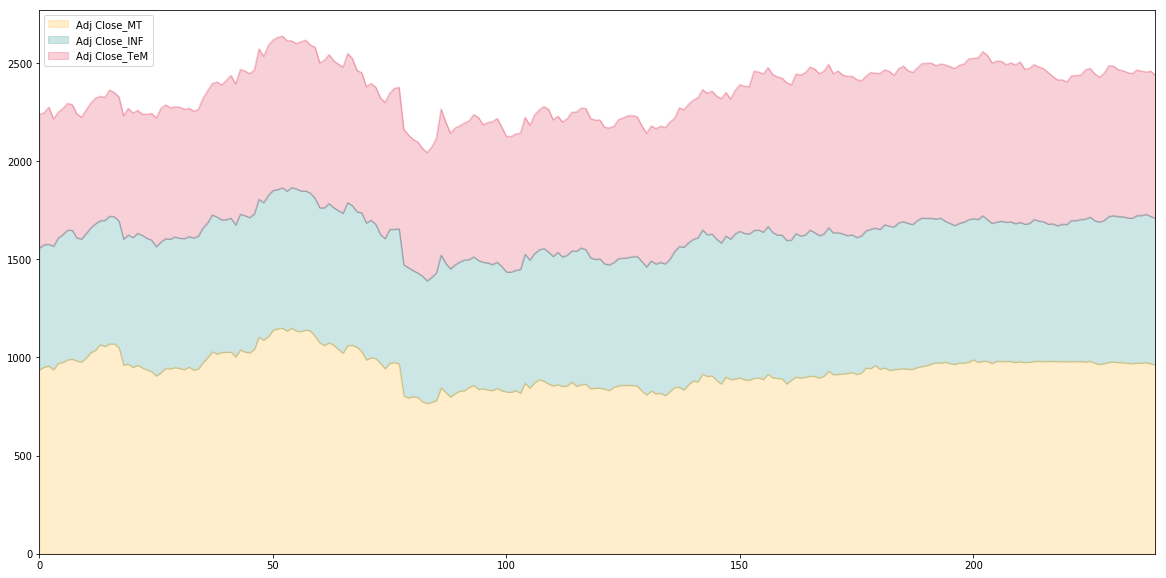

In [137]:
#@title Adj Close_
Stock[['Adj Close_MT','Adj Close_INF','Adj Close_TeM']].plot(kind='area',figsize=(20,10),color=['orange','teal','crimson'],alpha=0.2)
plt.show()

In [147]:
#@title Stats for the above graph
Stock[['Adj Close_MT','Adj Close_INF','Adj Close_TeM']].describe()

Adj Close_MT  Adj Close_INF  Adj Close_TeM
count    240.000000     240.000000     240.000000
mean     939.725897     692.280794     730.974722
std       83.221764      37.080117      55.616487
min      766.085205     610.476257     617.349976
25%      870.646271     660.125336     694.062515
50%      946.265167     698.951507     728.024994
75%      980.099976     722.444595     777.362503
max     1150.317749     756.562622     837.000000

Looks pretty good....

So, moving on, let's have a check on what the **Volume_MT, Volume_INF, Volume_TeM** has to say....




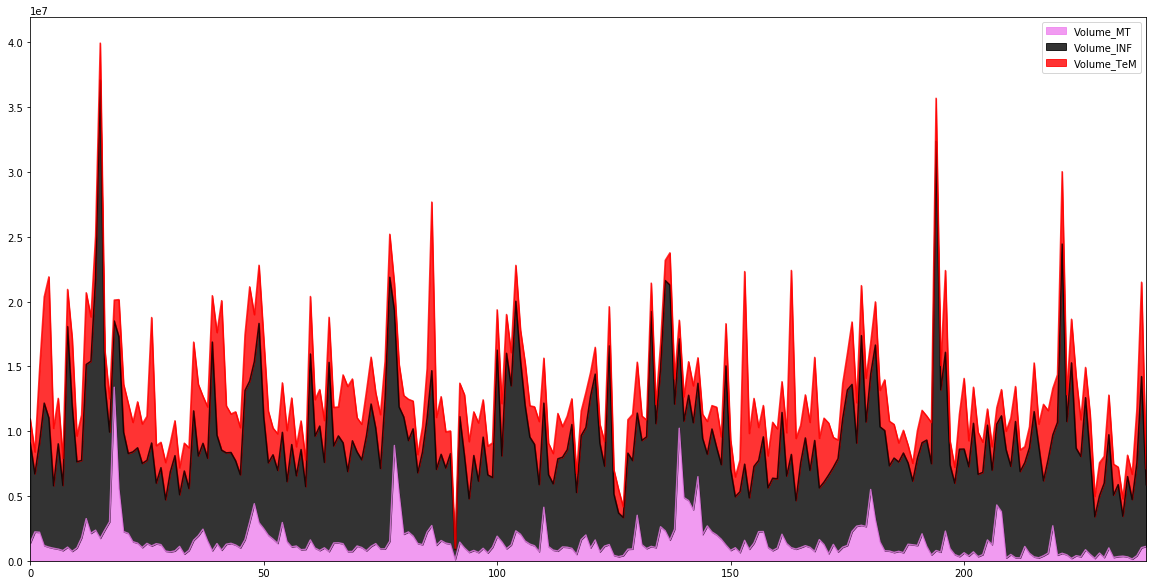

In [136]:
#@title Volume_
Stock[['Volume_MT','Volume_INF','Volume_TeM']].plot(kind='area',figsize=(20,10),color=['violet','k','r'],alpha=0.8)
plt.show()

In [148]:
#@title Stats for the above graph
Stock[['Volume_MT','Volume_INF','Volume_TeM']].describe()

Volume_MT    Volume_INF    Volume_TeM
count  2.400000e+02  2.400000e+02  2.400000e+02
mean   1.511725e+06  8.340989e+06  3.250788e+06
std    1.484545e+06  4.121235e+06  1.974906e+06
min    9.829100e+04  7.589560e+05  1.113760e+05
25%    7.587788e+05  6.007820e+06  2.062778e+06
50%    1.122134e+06  7.222918e+06  2.823268e+06
75%    1.687087e+06  9.308264e+06  3.707237e+06
max    1.338521e+07  3.534468e+07  1.486085e+07

So, here comes a really intresting insight, and we see the **highest volume** of shares that has been traded for is holded up by **INF**, **then comes TeM**, and **then comes MT**. Therefore, we can say that it's the **price** that has been **effecting** the whole game,  because if the prices **were higher** for **INF** and **TeM** they would have swelled up their profits. Also, the **volumes** traded for **MT** are pretty **low** as compared to INF and TeM, but due to **high prices** they have managed to earn **profits** with even **smallest amount** of shares **traded**.

Before moving to bivariate analysis, and see what all the data has still hidden from us, let's have a look at **Correlation** between the variables....

#Correlation: What correlates with What



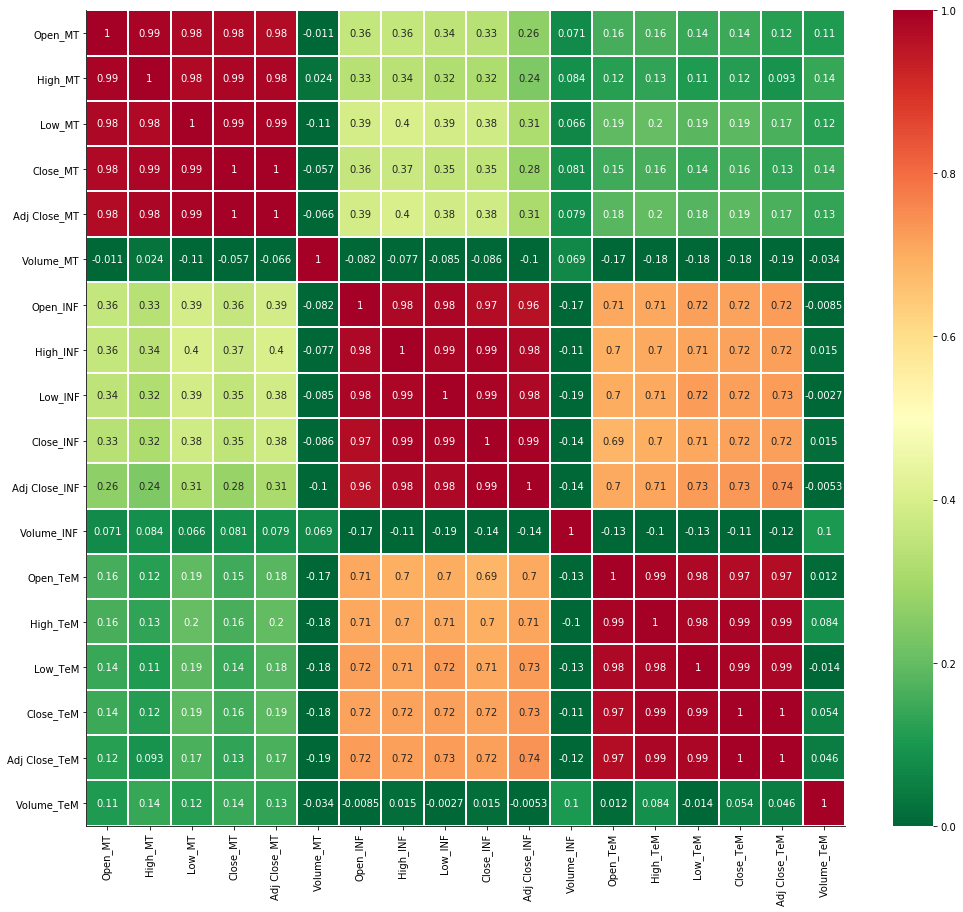

In [109]:
#@title The Heatmap
plt.subplots(figsize=(17,15))
sns.heatmap(Stock.corr(), vmin=0, vmax=1,annot=True, cmap='RdYlGn_r', linewidth=1)
sns.despine()

All we derive from it is that the stock values of INF an TeM have a comparitively higher correaltion because of their similar prices.

Let's move onto the Bivariate Analysis....

#Bivariate Analysis

We will further analyze our data to see what other variations do we come across.

Comparing the data with respect to **Date** will tell us a lot about it, so let's do this

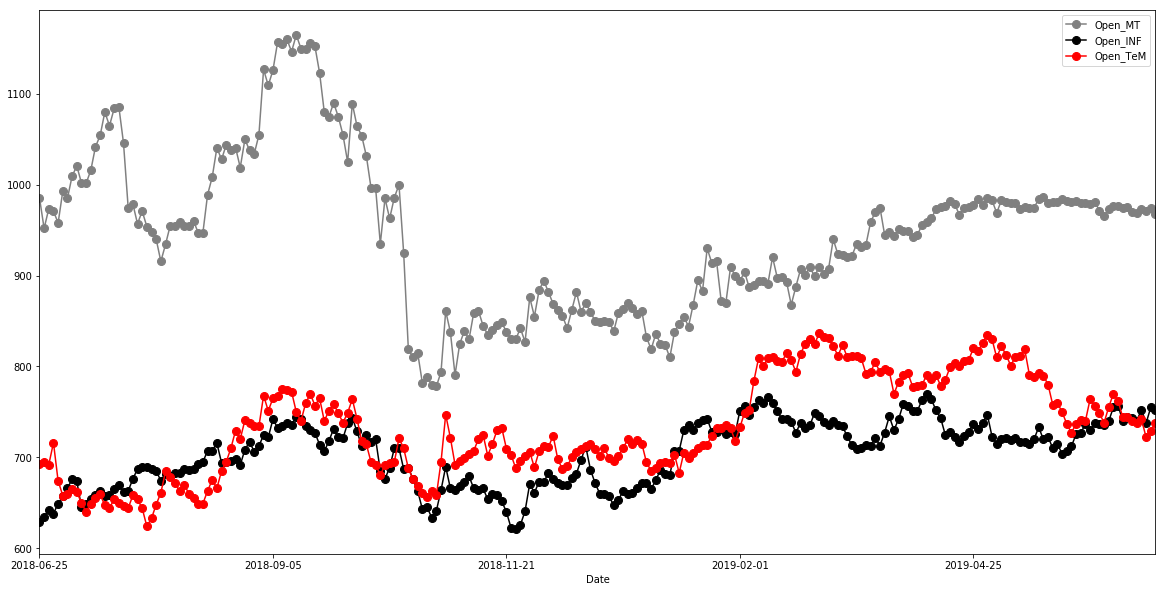

In [135]:
#@title Date vs Open_
Stock.plot(x = 'Date' , y = ['Open_MT','Open_INF','Open_TeM'] , kind = 'line', marker='o', markersize=8,color=['grey','k','r'], figsize=(20,10)).set_facecolor('white')
plt.show()

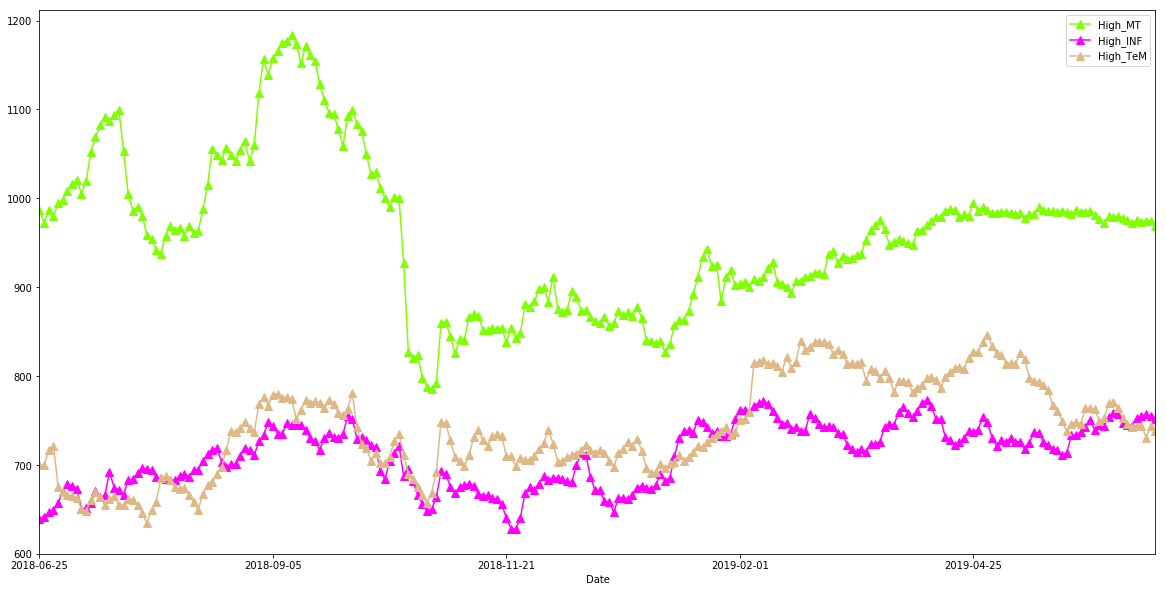

In [134]:
#@title Date vs High_
Stock.plot(x = 'Date' , y = ['High_MT','High_INF','High_TeM'] , kind = 'line', marker='^', markersize=8,color=['chartreuse','magenta','burlywood'], figsize=(20,10)).set_facecolor('white')
plt.show()

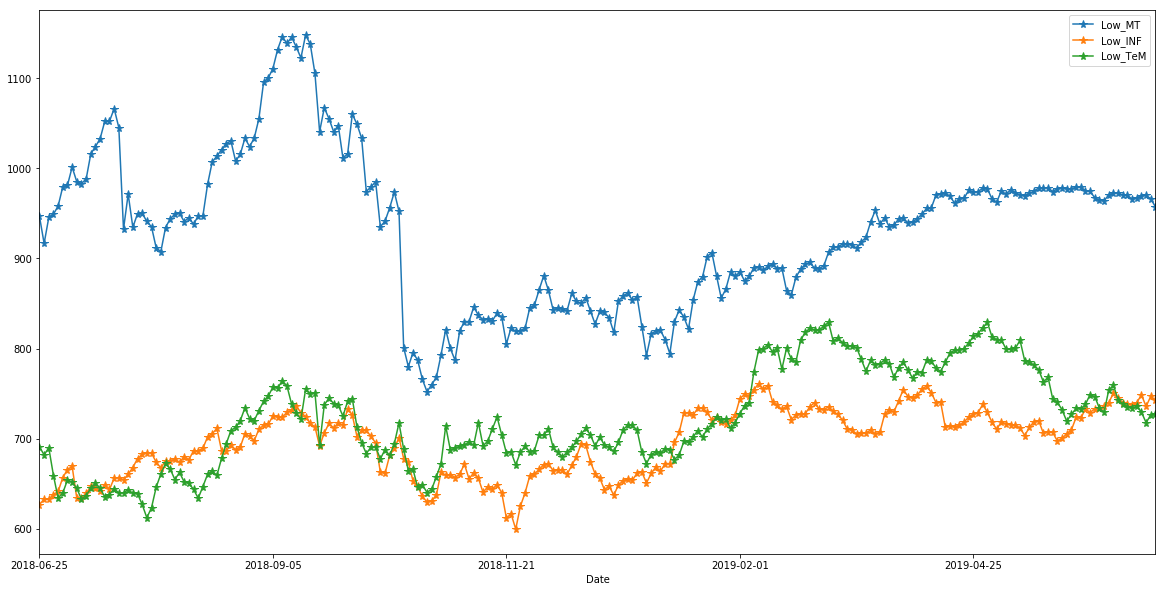

In [133]:
#@title Date vs Low_
Stock.plot(x = 'Date' , y = ['Low_MT','Low_INF','Low_TeM'] , kind = 'line', marker='*', markersize=8, figsize=(20,10)).set_facecolor('white')
plt.show()

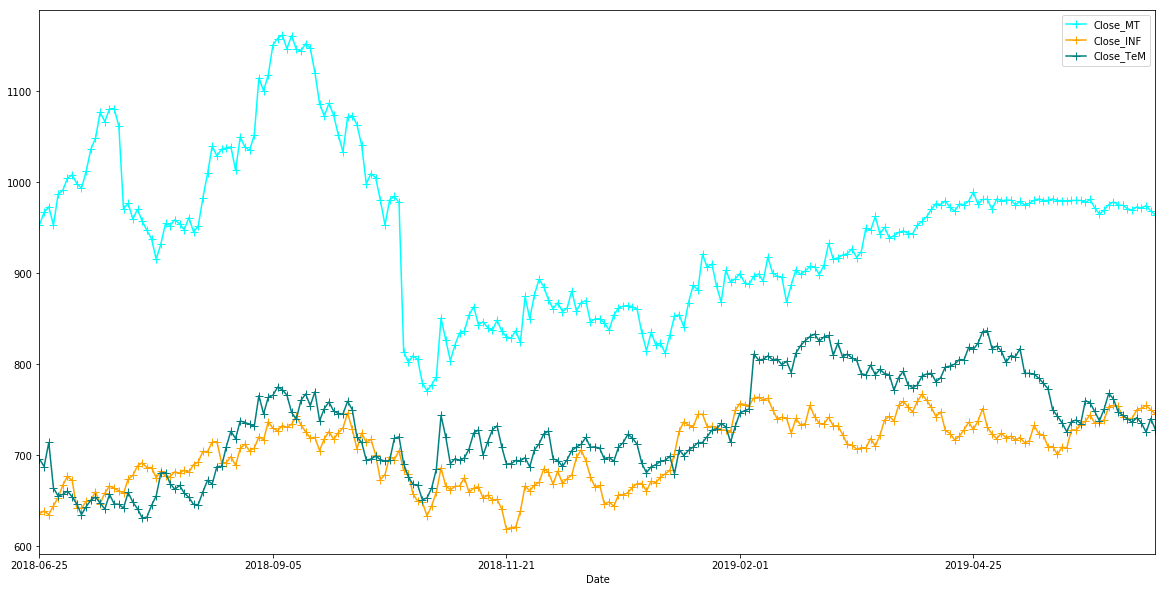

In [132]:
#@title Date vs Close_
Stock.plot(x = 'Date' , y = ['Close_MT','Close_INF','Close_TeM'] , kind = 'line', marker='+', markersize=8,color=['cyan','orange','teal'], figsize=(20,10)).set_facecolor('white')
plt.show()

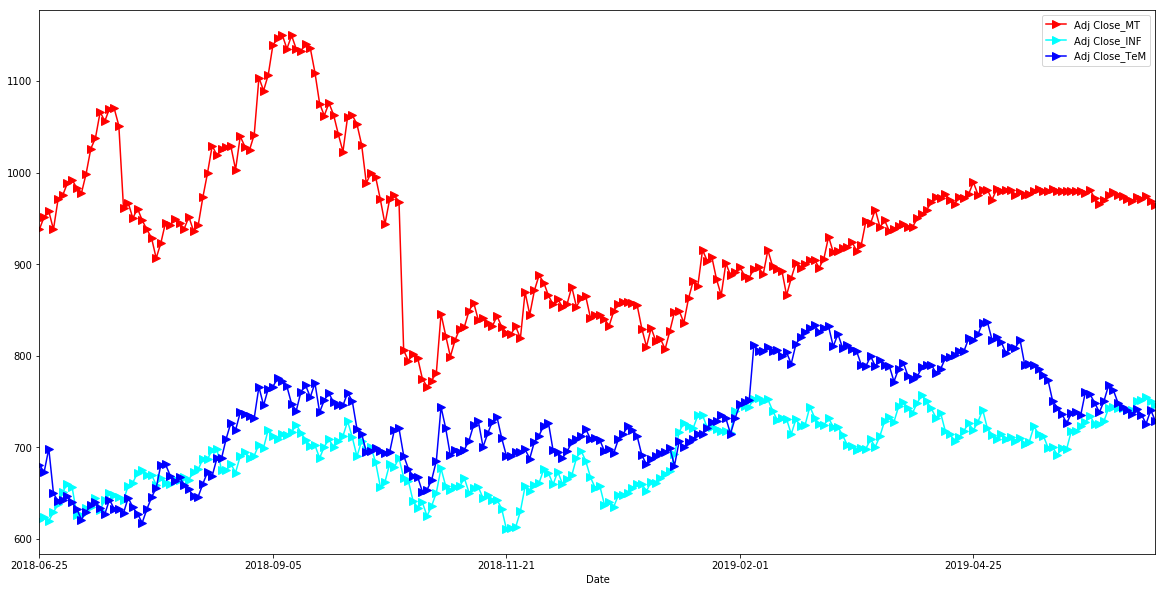

In [131]:
#@title Date vs Adj Close_
Stock.plot(x = 'Date' , y = ['Adj Close_MT','Adj Close_INF','Adj Close_TeM'] , kind = 'line', marker='>', markersize=8,color=['red','cyan','blue'], figsize=(20,10)).set_facecolor('white')
plt.show()

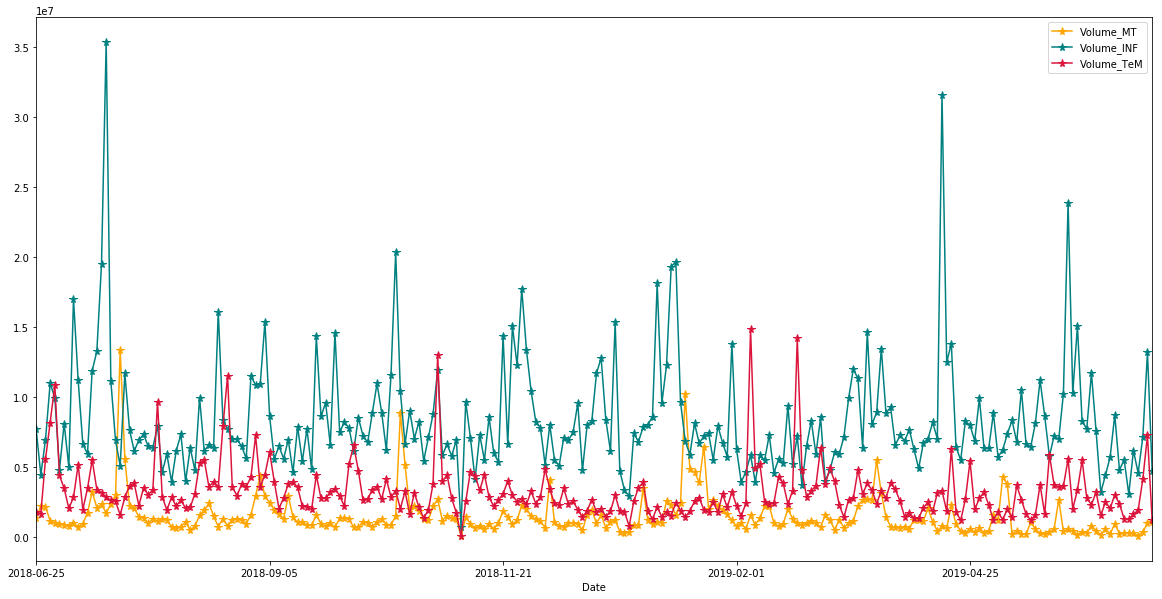

In [130]:
#@title Date vs Volume_
Stock.plot(x = 'Date' , y = ['Volume_MT','Volume_INF','Volume_TeM'] , kind = 'line', marker='*', markersize=8 ,color=['orange','teal','crimson'], figsize=(20,10)).set_facecolor('white')
plt.show()

As we have a look over those graphs, we find that the prices for the MT shares is slightly more than INF and TeM. And in over a year, their was a slight rise in the share prices of INF and TeM while MT kind of started and ended at the same price level, going through different highs and lows...


To have an overall look at what we have done, go through this.... 

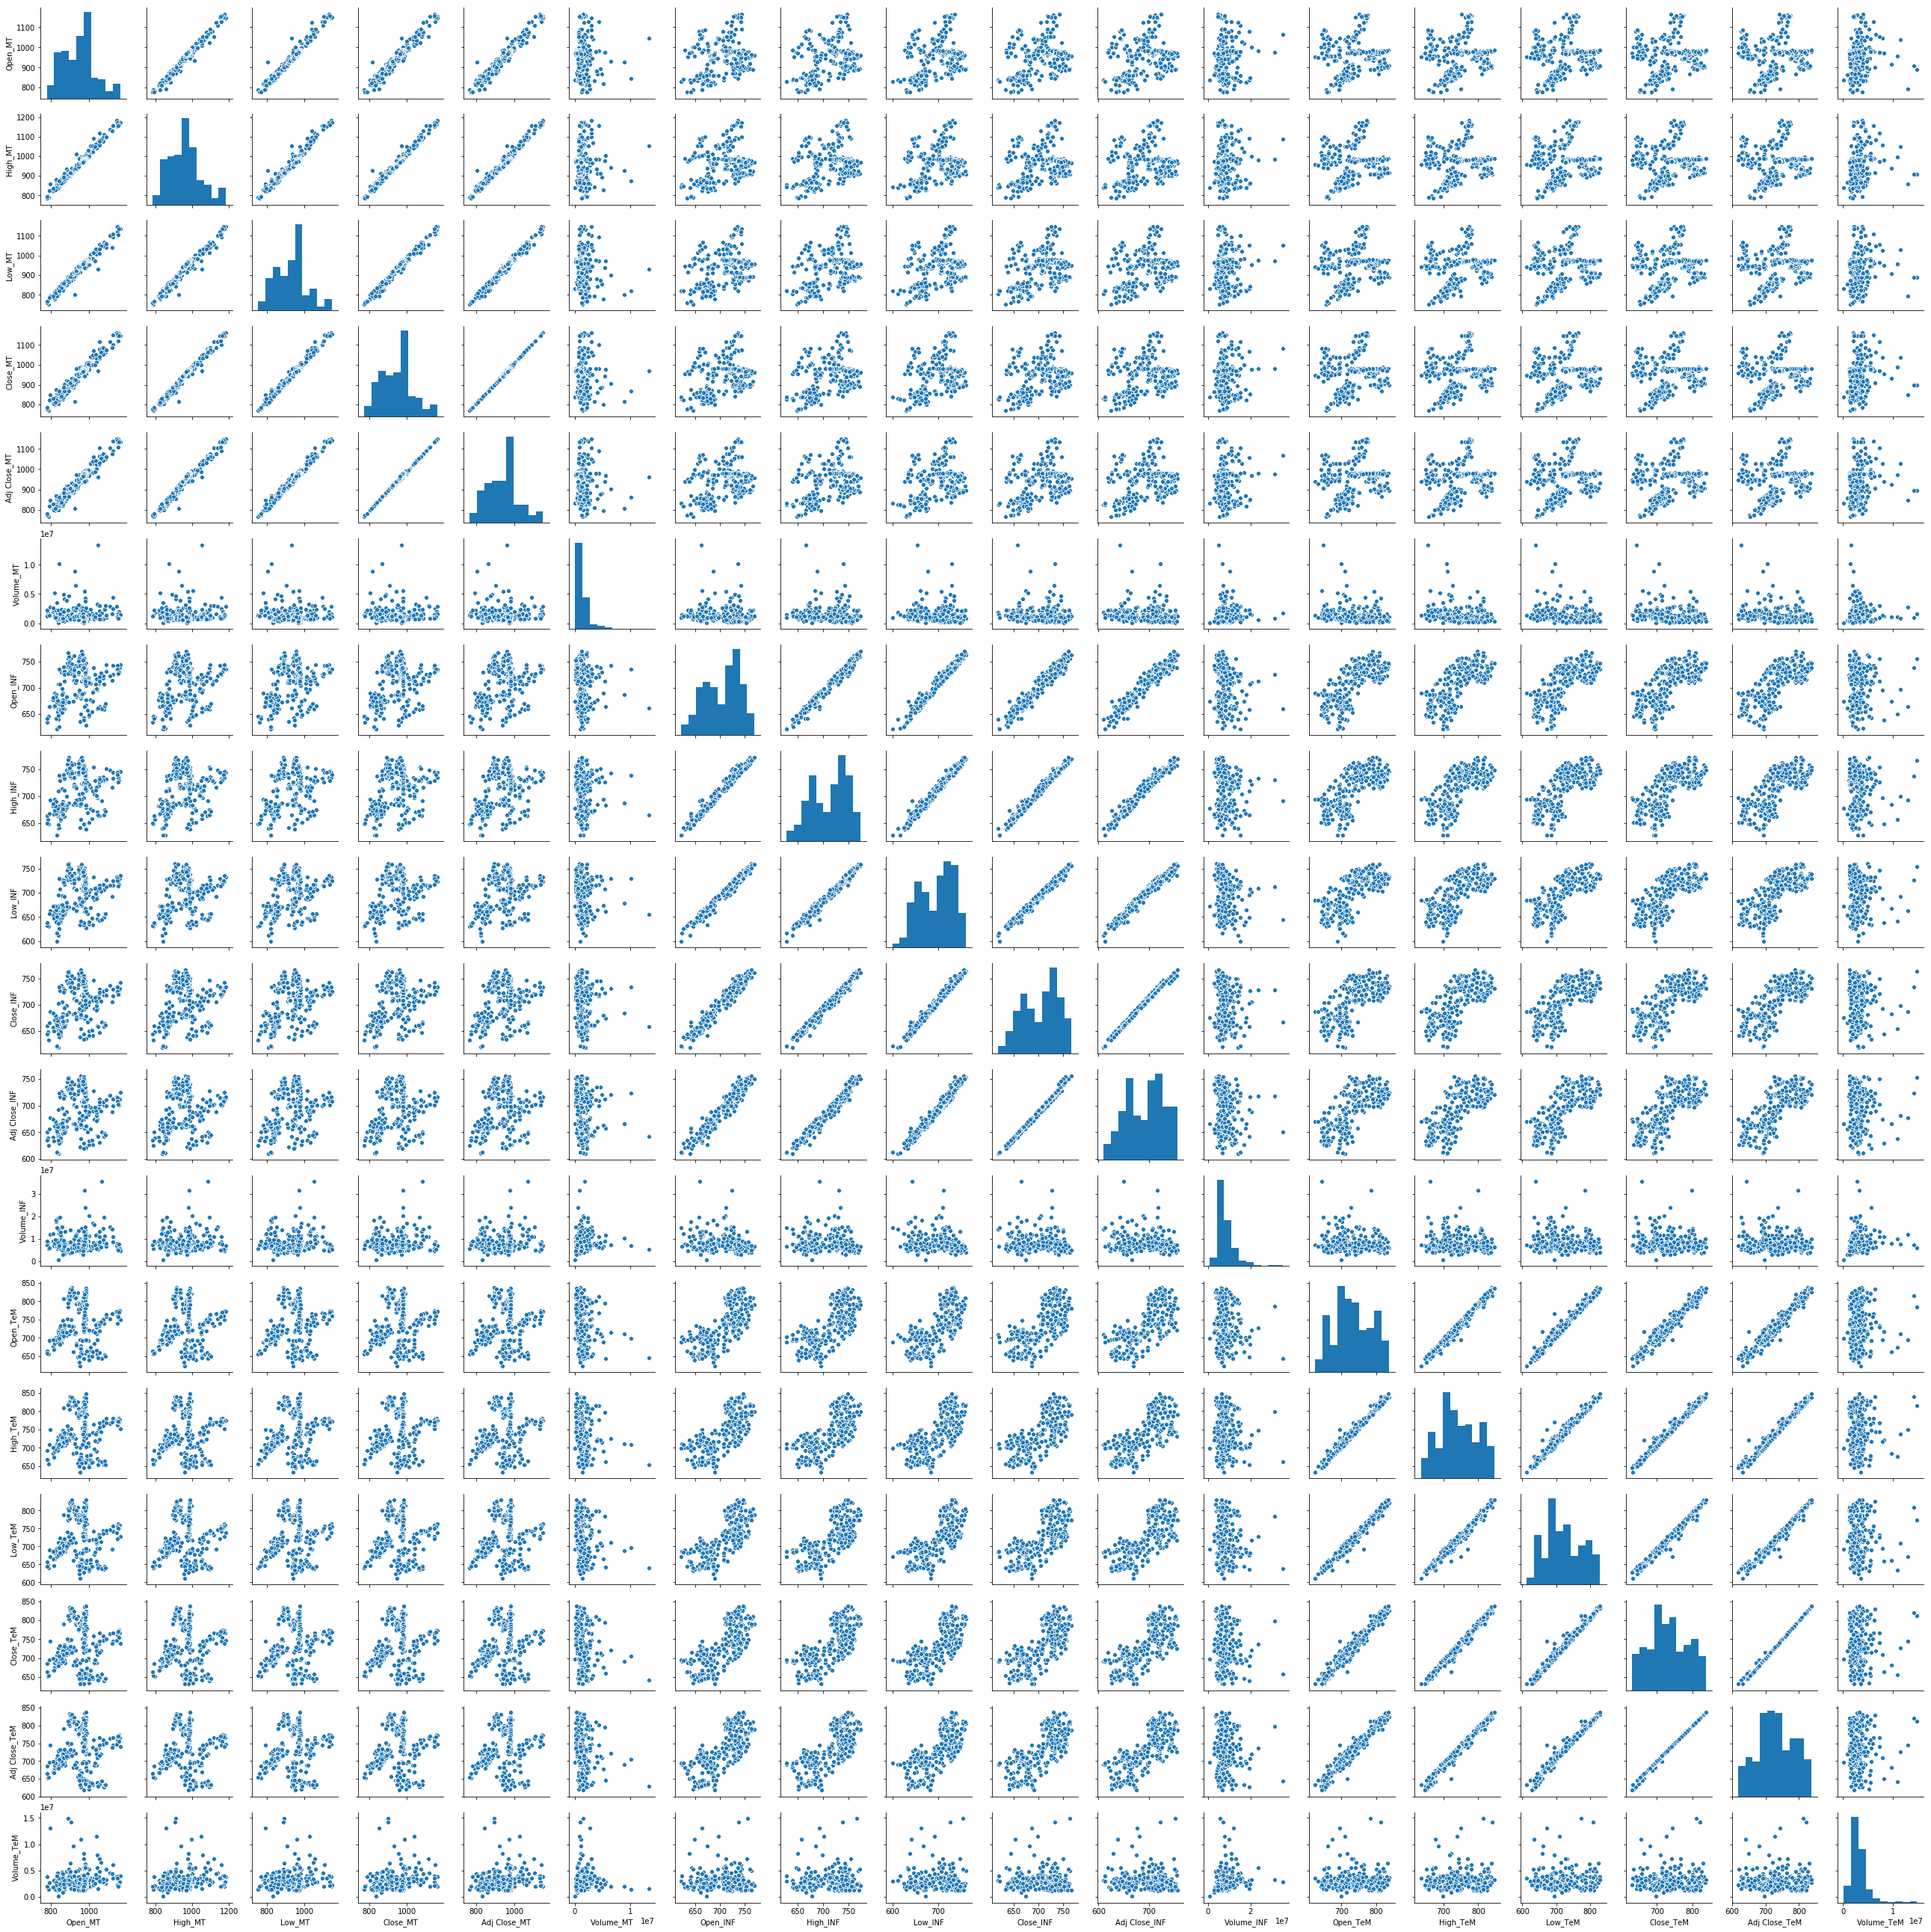

In [116]:
#@title Pairplots
sns.pairplot(Stock[['Date', 'Open_MT', 'High_MT', 'Low_MT', 'Close_MT', 'Adj Close_MT','Volume_MT', 'Date_Day', 'Open_INF', 'High_INF', 'Low_INF',
'Close_INF', 'Adj Close_INF', 'Volume_INF', 'Open_TeM','High_TeM', 'Low_TeM', 'Close_TeM', 'Adj Close_TeM', 'Volume_TeM',]],height=2);

#Multivariate Analysis

We will be analysing the dataset on the basis of three or more variables now (depends), Date being the common one amongst all our comparisions. We will now have a better picture of what these companies shares have gone through in a year....

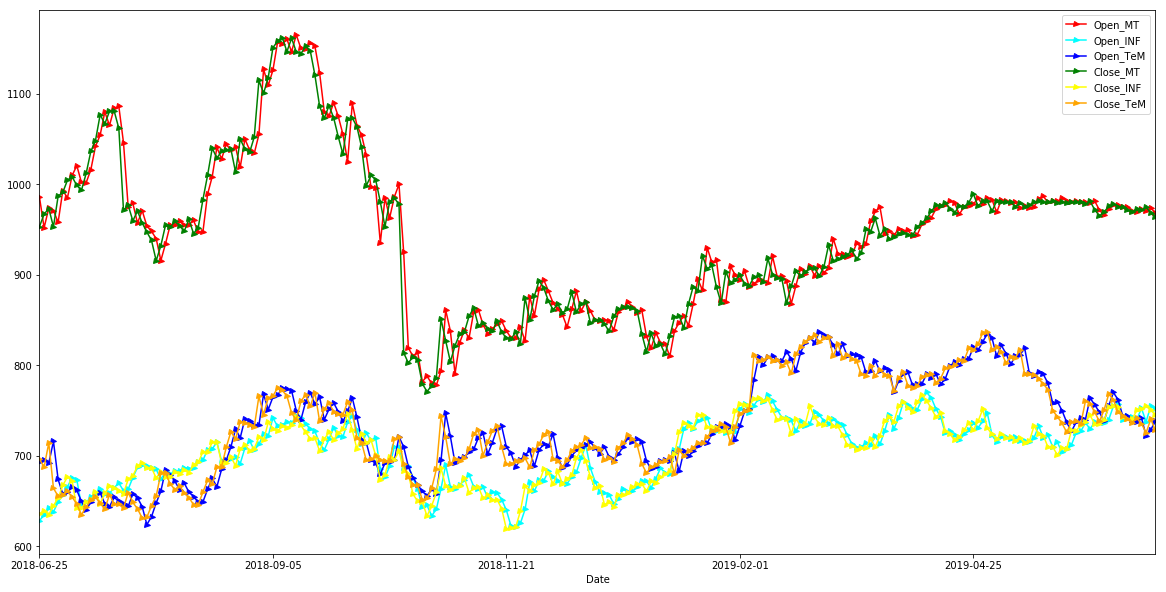

In [126]:
#@title Date, Open_ and Close_
Stock.plot(x = 'Date' , y = ['Open_MT','Open_INF','Open_TeM','Close_MT','Close_INF','Close_TeM'] , kind = 'line', marker='>', markersize=5,color=['red','cyan','blue','green','yellow','orange'], figsize=(20,10)).set_facecolor('white')
plt.show()

In [150]:
# @title Stats for the above graph
Stock[['Open_MT','Close_MT','Open_INF','Close_INF','Open_TeM','Close_TeM']].describe()

Open_MT     Close_MT    Open_INF   Close_INF    Open_TeM   Close_TeM
count   240.000000   240.000000  240.000000  240.000000  240.000000  240.000000
mean    946.569585   945.492500  704.781147  704.255727  733.338126  732.368334
std      85.148341    84.757116   35.535810   36.192250   53.500442   53.497714
min     778.000000   770.950012  621.000000  619.099976  624.000000  631.349976
25%     875.000000   876.175018  673.449997  673.162476  694.862503  694.225006
50%     955.024994   953.225006  712.899994  710.725006  729.250000  728.024994
75%     983.237503   980.837509  735.125000  733.475006  779.175003  777.362503
max    1165.000000  1161.949951  770.000000  767.250000  836.400024  837.000000

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

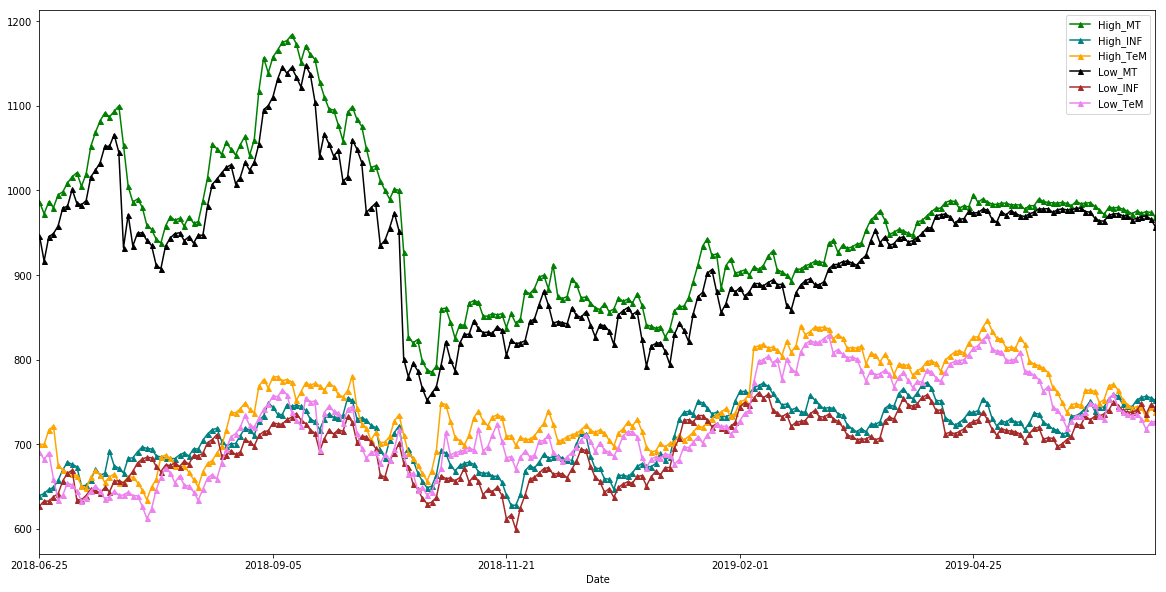

In [127]:
#@title Date, High_ and Low_
Stock.plot(x = 'Date' , y = ['High_MT','High_INF','High_TeM','Low_MT','Low_INF','Low_TeM'] , kind = 'line', marker='^', markersize=5,color=['green','teal','orange','black','brown','violet'], figsize=(20,10)).set_facecolor('white')
plt.show()

In [151]:
#@title Stats for the above graph
Stock[['High_MT','Low_MT','High_INF','Low_INF','High_TeM','Low_TeM']].describe()

High_MT       Low_MT    High_INF     Low_INF    High_TeM     Low_TeM
count   240.000000   240.000000  240.000000  240.000000  240.000000  240.000000
mean    959.584169   931.851666  711.924169  696.769061  742.374795  722.624582
std      85.841852    84.228493   35.314486   36.553985   52.820580   54.100191
min     785.450012   752.150024  628.000000  599.849976  634.599976  612.400024
25%     895.000000   860.687500  682.000000  663.824997  704.975006  685.187515
50%     967.700012   943.899994  719.550018  705.875000  738.000000  717.724976
75%     989.950012   976.337479  740.987488  727.112488  786.537476  769.424988
max    1183.800049  1147.800049  773.000000  761.000000  846.500000  829.099976

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

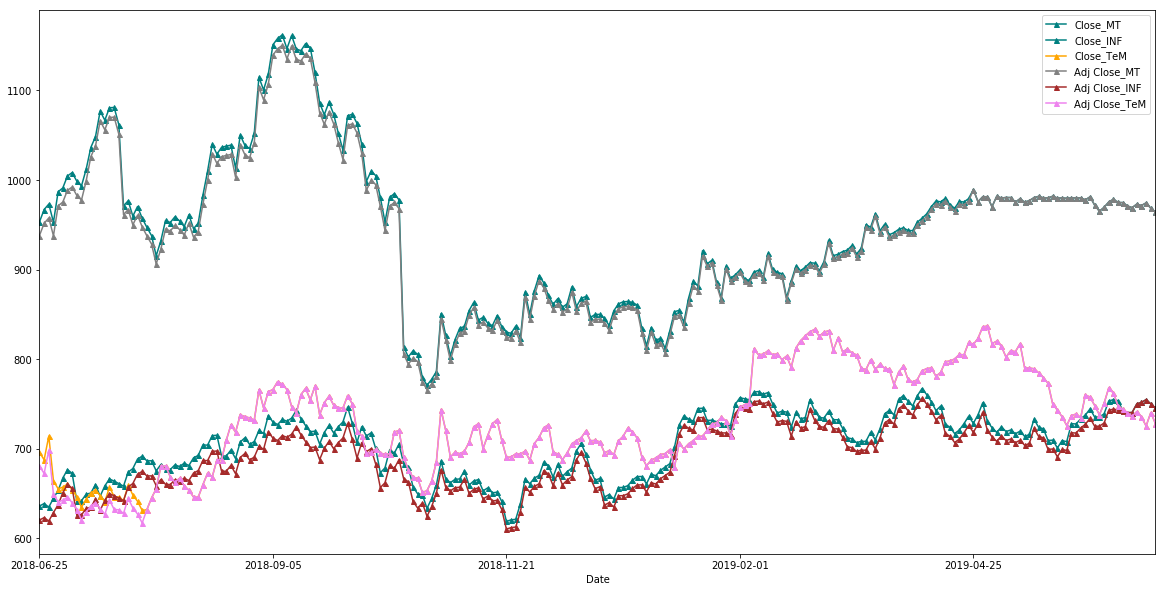

In [128]:
#@title Date, Close_ and Adj Close_
Stock.plot(x = 'Date' , y = ['Close_MT','Close_INF','Close_TeM','Adj Close_MT','Adj Close_INF','Adj Close_TeM'] , kind = 'line', marker='^', markersize=5,color=['teal','teal','orange','grey','brown','violet'], figsize=(20,10)).set_facecolor('white')
plt.show()

In [152]:
#@title Stats for the above graph
Stock[['Close_MT','Adj Close_MT','Close_INF','Adj Close_INF','Close_TeM','Adj Close_TeM']].describe()

Close_MT  Adj Close_MT  ...   Close_TeM  Adj Close_TeM
count   240.000000    240.000000  ...  240.000000     240.000000
mean    945.492500    939.725897  ...  732.368334     730.974722
std      84.757116     83.221764  ...   53.497714      55.616487
min     770.950012    766.085205  ...  631.349976     617.349976
25%     876.175018    870.646271  ...  694.225006     694.062515
50%     953.225006    946.265167  ...  728.024994     728.024994
75%     980.837509    980.099976  ...  777.362503     777.362503
max    1161.949951   1150.317749  ...  837.000000     837.000000

[8 rows x 6 columns]

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

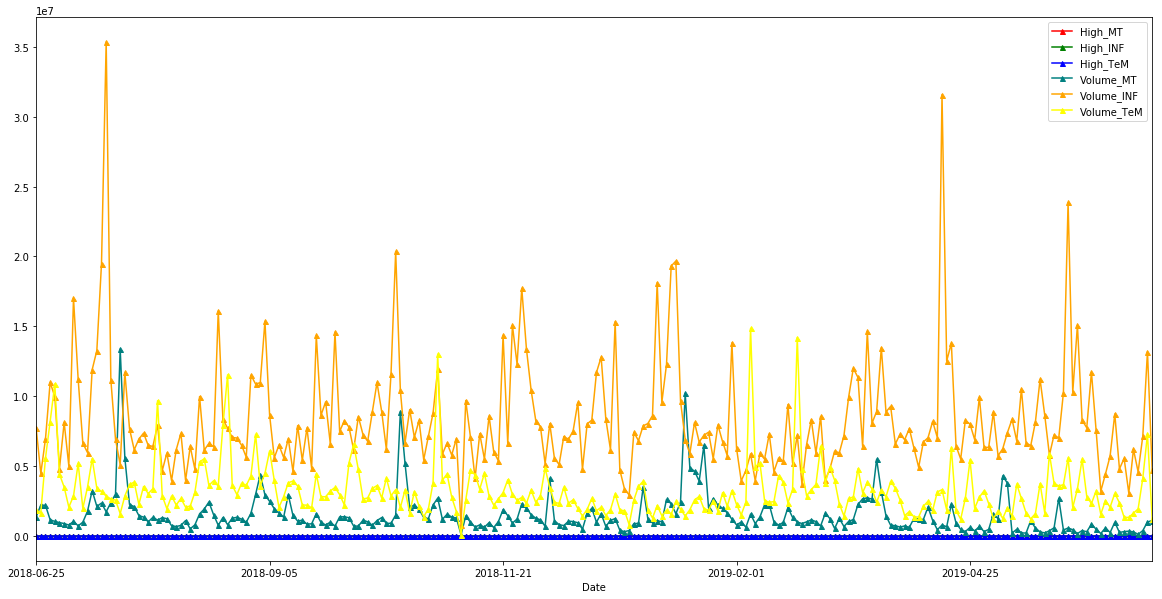

In [129]:
#@title Date, High_ and Volume_
Stock.plot(x = 'Date' , y = ['High_MT','High_INF','High_TeM','Volume_MT','Volume_INF','Volume_TeM'] , kind = 'line', marker='^', markersize=5,color=['red','green','blue','teal','orange','yellow'], figsize=(20,10)).set_facecolor('white')
plt.show()

In [153]:
#@title Stats for the above graph
Stock[['High_MT','Volume_MT','High_INF','Volume_INF','High_TeM','Volume_TeM']].describe()

High_MT     Volume_MT  ...    High_TeM    Volume_TeM
count   240.000000  2.400000e+02  ...  240.000000  2.400000e+02
mean    959.584169  1.511725e+06  ...  742.374795  3.250788e+06
std      85.841852  1.484545e+06  ...   52.820580  1.974906e+06
min     785.450012  9.829100e+04  ...  634.599976  1.113760e+05
25%     895.000000  7.587788e+05  ...  704.975006  2.062778e+06
50%     967.700012  1.122134e+06  ...  738.000000  2.823268e+06
75%     989.950012  1.687087e+06  ...  786.537476  3.707237e+06
max    1183.800049  1.338521e+07  ...  846.500000  1.486085e+07

[8 rows x 6 columns]

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Here's an intersesting point to note down, in both bivariate and multivariate analysis, while the INF and TeM were on a slow rise, the MT was advancing rapidly up the price chart, but somewhere between September 2018 and November 2018,
it had a downfall and due to that, ended up from where it started a year ago.

So, What actually happened?

After searching out for it, I found an article on businesstoday that says:-

**The MindTree stock sank in trade today after its Q2 revenue came below estimates and concerns over high valuation of the share persisted. The stock lost up to 17.66% or 172.95 points to hit an intra day low of 806 level on the BSE.  At 1:47 pm, the stock was trading 15.22% or 148.95 points lower at 830 on the BSE.**

*credit-[businesstoday](https://www.businesstoday.in/markets/company-stock/mindtree-stock-plunge-q2-earnings-mindtree-revenue-estimates/story/285782.html)*

**MT** saw a **drop** of a whopping  **17%** for a reason unkown and had its 5.4 million shares traded on October 19, 2018. It was the biggest drop in the last 7 years for the company.

Moreover, Larsen and Toubro Infotceh has been eyeing upon the company for a hostile takeover.

Definitely, the year wasn't good for the company as far as stock markets are considered.

#Conclusion

All in all, we can say it's the **prices** that play a vital role in the game of stocks. Even if you've traded for a less volume of stocks, but the prices were high, you are definitely going to earn a good profit. Also **Adj Close** is what we should take into consideration as it counts in all the factors that may effect the stock prices while the market is closed. 
Also, one thing to note is, before investing into any companys' stocks, have a good look at the history and the present of the company. Even a small rumour can bring down the stocks that have been sailing fairly through the market. So, be safe while you invest and do a good homework before stepping into the world of share markets. Happy investing!!!